# U.S. Medical Insurance Costs

This project analyses a dataset of US Medical Insurance Costs. The dataset gives us data of 
age, sex, BMI, number of children, if the person is a smoker or not, region and the costs of insurance.

The project answers the following questions:

- What is the average of age people that get insurance?
- Where is the majority from? 
- Do women pay more than men? 
- Does having more children affect the cost? 
- Does smoking affect the cost? 
- Does age affect the cost? 
- Does BMI affect the cost?

## Libraries

In [38]:
import csv
import matplotlib.pyplot as plt

## 1. Importing the dataset and saving it in a list of dictionaries

In [8]:
insurance_data = []
with open('insurance.csv', newline='') as dataset_csv:
    dataset = csv.DictReader(dataset_csv)

    for row in dataset:
        insurance_data.append(row)

## 2. Saving the ages and regions in different lists

In [28]:
ages = []
regions = []

for data in insurance_data:
    ages.append(int(data['age']))
    regions.append(data['region'])

## 3. Calculating the average of age

In [127]:
average_age = sum(ages) / len(ages)
print('The average age of people that get insurance is {}.'.format(int(average_age)))

The average age of people that get insurance is 39.


## 4. Finding where the majority is located

In [247]:
southeast = 0
southwest = 0
northwest = 0
northeast = 0

for region in regions:
    if region == 'southeast':
        southeast += 1
    elif region == 'southwest':
        southwest += 1
    elif region == 'northeast':
        northeast += 1
    elif region == 'northwest':
        northwest += 1

print('There are {se} users from southeast, {sw} users from southwest, {ne} users from northeast and \
{nw} users from northwest. Thus the users are aproximately distributed by region.'.format(
    se=southeast, sw=southwest, ne=northeast, nw=northwest))

There are 364 users from southeast, 325 users from southwest, 324 users from northeast and 325 users from northwest. Thus the users are aproximately distributed by region.


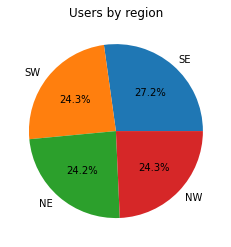

In [82]:
#pie chart
def region_perc(region):
    return 100 * region / len(insurance_data)

se_p = region_perc(southeast)
sw_p = region_perc(southwest)
ne_p = region_perc(northeast)
nw_p = region_perc(northwest)

labels = 'SE', 'SW', 'NE', 'NW'
sizes = [se_p, sw_p, ne_p, nw_p]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
plt.title('Users by region')
plt.show()

## 5. Do women pay more than men?

In [119]:
#This function counts the parameters that attend the options in options list, and when hasSomatory
#is true, it sums the charges as well, storing the values in lists

def count_and_total(dataset, parameter, options_list, hasSomatory):
    counter = [0 for i in range(len(options_list))]
    somatory = [0 for i in range(len(options_list))]
    for data in dataset:
        for i in range(len(options_list)):
            if data[parameter] == options_list[i]:
                counter[i] += 1
                if hasSomatory:
                    somatory[i] += float(data['charges'])
    return counter, somatory

In [122]:
users_by_gender, cost_by_gender = count_and_total(insurance_data, 'sex', ['female', 'male'], True)
avg_women_cost = cost_by_gender[0] / users_by_gender[0] 
avg_men_cost = cost_by_gender[1] / users_by_gender[1]

print('The average cost for women is ${} and the average cost for men is ${}. \n\
Thus men pay more than women in this dataset.'.format(round(avg_women_cost, 2), round(avg_men_cost, 2)))

The average cost for women is $12569.58 and the average cost for men is $13956.75. 
Thus men pay more than women in this dataset.


## 6. Does having more children affect the cost?

In [226]:
#This function accepts 4 ranges as a list (parameter options_list). 
#The options_list must be in ascendent order, where the numbers are inclusive in the range.

def count_and_total_range(dataset, parameter, options_list, hasSomatory):
    counter = [0, 0, 0, 0, 0]
    somatory = [0, 0, 0, 0, 0]
    for data in dataset:
        if float(data[parameter]) > options_list[-1]:
            counter[-1] += 1 
            somatory[-1] += float(data['charges'])
        elif float(data[parameter]) > options_list[-2] and float(data[parameter]) <= options_list[-1]:
            counter[-2] += 1
            somatory[-2] += float(data['charges'])
        elif float(data[parameter]) > options_list[-3] and float(data[parameter]) <= options_list[-2]:
            counter[-3] += 1
            somatory[-3] += float(data['charges'])
        elif float(data[parameter]) > options_list[-4] and float(data[parameter]) <= options_list[-3]:
            counter[-4] += 1
            somatory[-4] += float(data['charges'])
        else:
            counter[-5] += 1
            somatory[-5] += float(data['charges'])
    return counter, somatory  

In [227]:
#Finding the number of people and cost by number of children
#In this case, the last element in the resulting list will be for users with more than 3 children
users_by_children, cost_by_children = count_and_total_range(insurance_data, 'children', [0, 1, 2, 3], True)

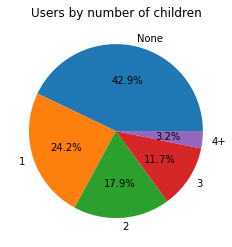

In [228]:
#pie chart
per_users_by_children = [100 * user / len(insurance_data) for user in users_by_children]
        
labels = 'None', '1', '2', '3', '4+'
sizes = [per_users_by_children[0], per_users_by_children[1], 
         per_users_by_children[2], per_users_by_children[3], per_users_by_children[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
plt.title('Users by number of children')
plt.show()

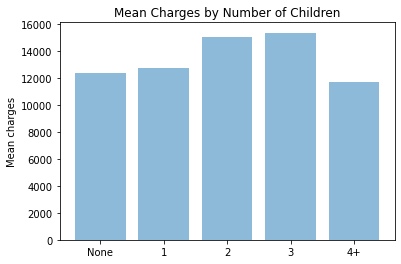

In [230]:
#mean cost by number of children
mean_cost_by_children = [cost_by_children[i] / users_by_children[i] for i in range(len(cost_by_children))]

labels = ('None', '1', '2', '3', '4+')
y_pos = range(0,5,1)
mean = [mean_cost_by_children[0], mean_cost_by_children[1], 
        mean_cost_by_children[2], mean_cost_by_children[3], mean_cost_by_children[4]]

plt.bar(y_pos, mean, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Mean charges')
plt.title('Mean Charges by Number of Children')

plt.show()

At first, it seems like having more children doesn't affect the cost.

## 7. Does smoking affect the cost?

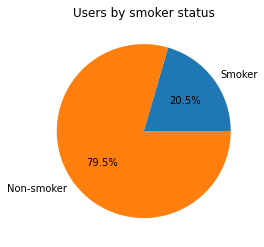

In [231]:
users_by_smoker, cost_by_smoker = count_and_total(insurance_data, 'smoker', ['yes', 'no'], True)
per_user_by_smoker = [100 * user / len(insurance_data) for user in users_by_smoker]

#pie chart
labels = 'Smoker', 'Non-smoker'
sizes = [per_user_by_smoker[0], per_user_by_smoker[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
plt.title('Users by smoker status')
plt.show()

In [258]:
mean_cost_by_smoker = [cost_by_smoker[i] / users_by_smoker[i] for i in range(len(cost_by_smoker))]

print("The mean charges for smokers is ${} and for non-smokers is ${}. \n\
This may imply that smokers tend to pay more than those who don't smoke.".format(round(mean_cost_by_smoker[0], 2), 
                                                             round(mean_cost_by_smoker[1], 2)))

The mean charges for smokers is $32050.23 and for non-smokers is $8434.27. 
This may imply that smokers tend to pay more than those who don't smoke.


## 8. Does age affect the cost?

The ages will be evaluated according to the following ranges:

$young: age \leq 33$

$adult: 33 < age \leq 48$

$senior: 48 < age \leq 64$

In [233]:
#In this case the range will be [17, 33, 48, 64].
#As I know there are no users under 17 and above 64, the first and last values will be 0.
users_by_age, cost_by_age = count_and_total_range(insurance_data, 'age', [17, 33, 48, 64], True)

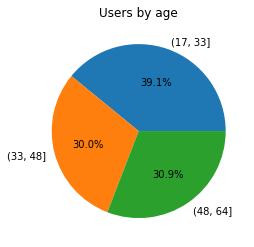

In [234]:
#pie chart
per_users_by_age = [100 * user / len(insurance_data) for user in users_by_age]

labels = '(17, 33]', '(33, 48]', '(48, 64]'
sizes = [per_users_by_age[1], per_users_by_age[2], per_users_by_age[3]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
plt.title('Users by age')
plt.show()

In [257]:
mean_cost_by_age = [cost_by_age[i] / users_by_age[i] for i in range(1, len(cost_by_age)-1)]

print("The mean charges for people under 33 is ${}, for people between 33 and 48 years \n\
old is ${} and for people above 48 the mean charges is ${}. \n\
This may imply that the charges tend to increase with the age of the user.".format(round(mean_cost_by_age[0], 2), 
                                                             round(mean_cost_by_age[1], 2),
                                                             round(mean_cost_by_age[2], 2)))

The mean charges for people under 33 is $9576.86, for people between 33 and 48 years 
old is $13679.49 and for people above 48 the mean charges is $17549.57. 
This may imply that the charges tend to increase with the age of the user.


## 9. Does the BMI affect the cost?

According to the National Heart, Lung and Blood Institute (NIH), the BMI can be classified as:

$Underweight: BMI < 18.5$

$Normal weight: 18.5 \leq BMI \leq 24.9$

$Overweight: 25 \leq BMI \leq 29.9$

$Obesity: BMI \geq 30$

In [236]:
#In this case the range will be [0, 18.4, 24.9, 29.9]. As there are no negative BMI values, the first value
#will be zero.
users_by_bmi, cost_by_bmi = count_and_total_range(insurance_data, 'bmi', [0, 18.4, 24.9, 29.9], True)

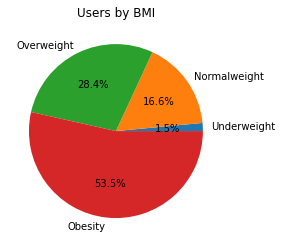

In [242]:
#pie chart
per_users_by_bmi = [100 * user / len(insurance_data) for user in users_by_bmi]

labels = 'Underweight', 'Normalweight', 'Overweight', 'Obesity'
sizes = [per_users_by_bmi[1], per_users_by_bmi[2], per_users_by_bmi[3], per_users_by_bmi[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
plt.title('Users by BMI')
plt.show()

In [255]:
mean_cost_by_bmi = [cost_by_bmi[i] / users_by_bmi[i] for i in range(1, len(cost_by_bmi))]

print("The mean charges for underweighted people is ${}, for normalweighted people ${}, \n\
for overweighted people ${} and for obese people ${}. \n\
This may imply that the charges tend to increase with the BMI of the user.".format(round(mean_cost_by_bmi[0], 2), 
                                                             round(mean_cost_by_bmi[1], 2),
                                                             round(mean_cost_by_bmi[2], 2),
                                                             round(mean_cost_by_bmi[3], 2)))

The mean charges for underweighted people is $8852.2, for normalweighted people $10379.5, 
for overweighted people $11006.81 and for obese people $15491.54. 
This may imply that the charges tend to increase with the BMI of the user.


# Conclusion

This project investigated the available dataset in order to find out how the parameters influence the insurance costs.

According to the results, it seems like the most influencing parameters are **age**, **smoking** and the **BMI**, which makes sense because these are parameters that have influence on the user's health. 

The number of children doesn't seem to affect the cost and the gender also seems to have little influence on these costs. 